# Goal of the project

The goal of this project is to control a 2D quadrotor to reach a target while avoiding obstacles using a learned policy. You wil have to create your own Custom environment using the [stable_baselines3](https://stable-baselines3.readthedocs.io/en/master/) library and train a RL agent using PPO.

## 2D quadrotor

The quadrotor is depicted in the following figure
<img src='quadrotor.png' width="300">


The quadrotor model is written as
$$\begin{align}
\dot{p_x} &= v_x\\
m \dot{v}_x &= - (u_1 + u_2) \sin \theta \\
\dot{p_y} &= v_y\\
m \dot{v}_y &= (u_1 + u_2) \cos \theta  - m g\\
\dot{\theta} &= \omega\\
I \dot{\omega} &= r (u_1 - u_2) \end{align}$$
where $p_x$ is the horizontal and $p_y$ the vertical positions of the quadrotor and $\theta$ is its orientation with respect to the horizontal plane. $v_x$ and $v_y$ are the linear velocities and $\omega$ is the angular velocity of the robot. $u_1$ and $u_2$ are the forces produced by the rotors (our control inputs). $m$ is the quadrotor mass, $I$ its moment of inertia (a scalar), $r$ is the distance from the center of the robot frame to the propellers and $g$ is the gravity constant. To denote the entire state, we will write $x = [p_x, v_x, p_y, v_y, \theta, \omega]^T$ - we will also write $u = [u_1, u_2]^T$.

The module ```quadrotor.py``` defines the problem and provides all the useful information about the robot and methods to simulate and animate it as shown below.

You can access the different parameters of the model in the following way:

In [1]:
import quadrotor

print("Mass    =", quadrotor.MASS)
print("Length  =", quadrotor.LENGTH)
print("Inertia =", quadrotor.INERTIA)
print("Dt      =", quadrotor.DT)
print("state size   =", quadrotor.DIM_STATE)
print("control size =", quadrotor.DIM_CONTROL)

Mass    = 0.5
Length  = 0.15
Inertia = 0.1
Dt      = 0.04
state size   = 6
control size = 2


The goal of this project is to learn a policy that can move the robot from any point to the red dot ($x^{\star} = [2, 0, 0, 0, 0, 0]^T$) while avoiding thee obstacles. The obstacles are represented by the black circles in the animation. You can check if the drone is in collision with an obstacle using the function ```quadrotor.check_collision```.

## Create a RL environment
Using the [stable_baselines3](https://stable-baselines3.readthedocs.io/en/master/), create a [custom RL environment](https://stable-baselines3.readthedocs.io/en/master/guide/custom_env.html) environment. You will have to follow the following steps:

1. Implement a step function than contrains the dynamics (you are free to use the ```quadrotor.next_state```) and a reward function. To speed-up the training, make sure to add a gravity compensation term in your dynamics (i.e. the drone should stay in place when the policy outputs zeros).
   The reward should be made of three terms:
   
- A positive term to incentivize the quadrotor to reach the target. You can start with a reward bounded between 0 and 1, e.g.
   $\operatorname{exp}(-\frac{1}{2} (x - x^{\star})Q(x - x^{\star}) -\frac{1}{2} (u - u_{\text{gravity}})R(u - u_{\text{gravity}}))$

   
- A large negative penality(e.g. -100)  if the robot get out of the following bounds:
$ p_x \in [-4, 4], \quad v_x \in [-10, 10] , \quad p_y \in [-4, 4] , \quad v_y \in [-10, 10] , \quad \theta \in [-2 \pi, 2 \pi] , \quad \omega \in [-10, 10] $.

 - A negative penalty if the robot hits the obstacle, e.g. -1. You should use the ```quadrotor.check_collision```.

Keep in mind that, in RL, the goal is to maximize a reward (and not minimize a cost like in Optimal Control).

2. Implement a reset function that initializes the state randomly. You can sample uniformly between $[-2, 2]$ for $p_x$ and $p_y$ and initialize the other terms to zero. Make sure to reject samples that are colliding with the obstacles using the ```quadrotor.check_collision```.

3. In the step function, stop the environment using ```truncated``` after 200 steps (Here is an [example](https://colab.research.google.com/github/araffin/rl-tutorial-jnrr19/blob/sb3/5_custom_gym_env.ipynb)).

4. In the step function, stop the environment if the drone goes outsite of the provided bounds using ```terminated``` (Here is an [example](https://colab.research.google.com/github/araffin/rl-tutorial-jnrr19/blob/sb3/5_custom_gym_env.ipynb)).

5. Make sure that your environment is well defined using the ```check_env``` function.
   
## Training a policy with PPO   
Train a policy with PPO and use the learned policy to define a controller. Make sure that you can reach the target while avoiding the obstacles starting from $x_0 = [-2, 0, 0, 0 ,0, 0]$



Please submit your code (as runnable Jupyter Notebook), a pdf report and an mp4 video. In the report, explain your reward design and provide plots showing the trajectory of the quadrotor. The mp4 video should show the quadrotor animation starting from $x_0 = [-2, 0, 0, 0 ,0, 0]$. You can save your animation in the following way:


In [2]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.animation as animation
import IPython


def controller(x, t):
    return np.zeros(2)

x_init = np.array([-2, 0, 0., 0 ,0, 0])
horizon_length = 200
t, state, u = quadrotor.simulate(x_init, controller, horizon_length)
quadrotor.animate_robot(state, u, save_mp4=True)

<source type="video/mp4" src="data:video/mp4;base64,AAAAIGZ0eXBNNFYgAAACAE00ViBpc29taXNvMmF2YzEAAAAIZnJlZQAASWJtZGF0AAACrwYF//+r
3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE2NCByMzEwOCAzMWUxOWY5IC0gSC4yNjQvTVBF
Ry00IEFWQyBjb2RlYyAtIENvcHlsZWZ0IDIwMDMtMjAyMyAtIGh0dHA6Ly93d3cudmlkZW9sYW4u
b3JnL3gyNjQuaHRtbCAtIG9wdGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFs
eXNlPTB4MzoweDExMyBtZT1oZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVk
X3JlZj0xIG1lX3JhbmdlPTE2IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBk
ZWFkem9uZT0yMSwxMSBmYXN0X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTE1
IGxvb2thaGVhZF90aHJlYWRzPTIgc2xpY2VkX3RocmVhZHM9MCBucj0wIGRlY2ltYXRlPTEgaW50
ZXJsYWNlZD0wIGJsdXJheV9jb21wYXQ9MCBjb25zdHJhaW5lZF9pbnRyYT0wIGJmcmFtZXM9MyBi
X3B5cmFtaWQ9MiBiX2FkYXB0PTEgYl9iaWFzPTAgZGlyZWN0PTEgd2VpZ2h0Yj0xIG9wZW5fZ29w
PTAgd2VpZ2h0cD0yIGtleWludD0yNTAga2V5aW50X21pbj0yNSBzY2VuZWN1dD00MCBpbnRyYV9y
ZWZyZXNoPTAgcmNfbG9va2FoZWFkPTQwIHJjPWNyZiBtYnRyZWU9MSBjcmY9MjMuMCBxY29tcD0w
LjYwIHFwbWluPTAgcXBtYXg9NjkgcXBzdGVwPTQgaXBfcmF0aW89MS40MCBhcT0xOjEuMDAAgAAA
GiJliIQAN//+9vD+BTY7mNCXEc3onTMfvxW4ujQ3vc4AAAMAAAMAAAMAADSY0H4zd2rDhiAAAAMA
JgAGCANgAzAEdwBJhifrPwALwRFkBJwPzJUmFGT2qHXo4m6RCitIlhRYet3pioe7PtHMnO4JkntJ
ujXVK9mpvpov1Dq5CrLp26+E/qiy2XJ1DXbFQFIeD6dj4d/Ycg4MlRjSj5F/jO4dneZbKchBkxER
1+dwaLseoQTUOIHe+AjMd/01j3lkHunyumHGATF5QfuGMNEhmAiiUAYOIeHxFiIgg2yx/sREsJlD
kHggnz8ibjDHy6sod15ejTD7nM3nSKn356x7NU+rLjiy+TGV7zlKZBPivMIavE++a9A0lqsJYdgr
ySjKMHT/BXnDAgmDXfO64jpiyGPFAqtkFWJ5TEQleZ1J5ApIiAbrmqAKw3p8+/i/wJs8O+8pdk8P
HVf783TzYB8jTD3e0Hrvk+m9yV30qkBMD1Yt4BTv0v5PnW3SFFwb09VLJ9/bXt1O+1kRJX5xMW1e
bcxaI7p3o1o16zYnHIiBryP8xbcKoEheOGQta91Jwpm+DwxVqqu9he48e1d2jH7aO0yXqsT2b/qz
7oLLlMh42Npded9tcQEhFDRNo5nfOSlKKeMLR8VskNKSA1Xup+D3KKP/Ucrk7dfblkrlCV0OT9R8
e1VeUJLnSiEnVqg5IfgEg1c+fw2G5gVw6gXCXLWJHWwLr7Zv9ubJ4/o4TKWpJu/d/99C6V3hQlL2
dlAntVuqdmAD3B0j6kW79UlFofjws1/8vyTk5+XWigBqqZX44ebKxHmP3OL0k0UfeSfDOZ+P0xnA
MS0Nz6yx3NhjD52RCX8aAvsAWIQQMqYvxcvcTCNbnLx8piLuXeNtrcp36rh1Mqz7PhKBiVgCkoe7
AP9TFTR0BGZ/D1cdBO83QAs0kqTjhk1oWhee5U2ZsL9uX343+EM2LLyd4BX9xHjeJfWQ6Z7ezogx
3+TeCvXrSblDJjbAaN/iIL4/CBV6HZLpVc80LOi1PXXp/r8M01VBIKfbeQARE9bL+Sy2S0BhyqRQ
Qpe1EL6xKWhDNZrpwd1cJgyGC10oKR6wMLcqBkxiXAcfyTKZPcwd2/pdK/Up6eN46byB6eh/AxyG
eNXPgyepR7S3jOi2dwAc8JnqoueT/CRHmHE50xOJAafyHV09BeWKepHBfDZo7loWoPVYZft6dyUK
BCZ0zHzOeJv/Qtw8gQnQSvhcrvRiqR58UdRAebWcct0k152VdbNffOhv7LlY89HDdRPRTyCZuhP1
NqbFQjh83FOIPjL22RZFj9Sm0uxTHPyMeOnzUYOiMGIH+NJL8I27a5mlamA2lYIDOMIdRLB8J8Zm
wvI50H5pdxS1YpMrysZYTeEX5CpXOTwErE5hkRFoPFdlzRGAt/8UQcqF1eitLQGMNODVSfeUhJiH
9OnDHM2eLuFQ0emGHhtrUNQKBKdqL7V2+97pOQnRE6HFflyH59vJ/8Hf7aWPXOyQWFLJXQ82DNEP
zIJkWEA0oQ69mL0U9F1QbOXPbR1+qZHCygBVnCPdzwn4TcV/tI6jH7QIp1K6KqWZCB4tW5sTVUv4
3lb62WbSN5dKhOQZJ4uOtooOY37g8xs/DP/J6W8XbJVgkOI99VLlWPgpIwcNfV1F/4+Ohfq/MaA7
bkFf7abk+PzzJiPupS0mQ50i4n26Zrm8o97XF8pX57bGd7u+63venSuw4KSawMQv8/3yFSnl8cmI
2+pqs9EGkGsQlO9P5B7pgN6neOV7vWyQevVpX3M/5J+WM7rwBGO1G+jk6VwrpPSXz/5PhfSArTRs
78Ki5El9ka4S2XjU6iYFBmoVoeQyq71clfvvQYAAV+Q7dxJAnFV3gdzWQxgpw0aMwvSiWG7ZcEM+
W5IJnezfTG7qFGK8wfcnzyH9VjoDykKUzblfzrJm8EVPlY25ja8hsdEQkUbT/4hRRGMxefBGXegc
CQGd9oGJ6rBIc4faDDgUeGZ9YU8XepQl1WLKj43j7i1q7ij8BB/+2Sat8y/0pgJ4IQD0muU+g5na
u76c1YC5cRNsB7XnZYrJQOLoN2iNnsYyYAHcHDtx+eXkukSPKigr8/VYPYmpvGQCDIDRi0yBYz65
rACY65IwgZ5ZnAkB2BiE98lxwKPpOgCGVEA1YiExc10w9UbmS91fYrzNJWbP09f/ybrEXsKU/Xtq
KAGgAA/kW0bHOibpm+kyFUZJR7RpJ0+js8TdDa5HW1S9ew5ytzwTWaSSxidN7sVSn21UYpyVbbxP
Wb2ot099nCsoJGEGGcxD0e6V2I7uPFOZZRwiUu+mzku4lX/hvuGBZj5OzHiKmb8xYRnJsNfiXkOa
8AAAAwAAAwAHOswDK6PtkGTR7OJtRsHYAqrmdYip02+O3lhEp87cNePib/RjkOejVqbJMXAZRx9/
EM+J9ss/cKFB5/c1OUHPhN8nOqrit1+CXRmPFFOJizn7HT+L3JkN8MNn4S1SKSn73sm2WJPmuFzo
hRBUjAIDHBkX/ytZ8pcNyMg45skdtK+/icoGITIM52VF9Pj+73a1T2FNkH4sCGuA2IA1QoEb4qYL
3ad/VDFp1YCL59MeSZyrsbYzwUt/zbOpbugFCRTEVpmon5R37q8xZvBn9564WYvWwWv+Op8ZSJCm
XiPNxdQTlsoO+CvcISsQ+nOL5p2K7/k9KuRUQDWJMPCh3swp0/zLiZB6J06XviSL7BDkSLP5D6oX
sMF3jpnrdLgQ/dV0v0HW9c8k0HN6+l/tNRPTBImylRTM9Gj7x0hQKZmlCnxHIREB/BbKPkjM9FfQ
gUfCl0WsBkgsnxXI379BOm55EVg/S1yBju+i1kUMhrm1ydkFkFhXDt4aJv+yFyyoZt+pPosO2RpM
xAf28tyKSKwmRH9fWK9XB

# Project Implementation
### Name: Vineela Reddy Pippera Badguna
### NetID: vp2504

In [3]:
# Installing the libraries required if not installed yet
!pip install stable-baselines3 gymnasium numpy matplotlib moviepy

In [4]:
# Importing necessary libraries
import gymnasium as gym
import numpy as np
import quadrotor
import torch
from gymnasium import spaces
from stable_baselines3.common.env_checker import check_env
from stable_baselines3.common.utils import set_random_seed
from stable_baselines3 import PPO
import matplotlib.pyplot as plt
%matplotlib inline

# Setting up seeds - For reproducibility
seed = 20
np.random.seed(seed)
set_random_seed(seed)
torch.manual_seed(seed)

In [5]:
# Defining quadrotor environment
class QuadrotorEnv(gym.Env):
    metadata = {'render.modes': ['human']}

    # Initializing
    def __init__(self):
        super(QuadrotorEnv, self).__init__()

        # Getting constants from quadrotor.py
        self.mass = quadrotor.MASS
        self.length = quadrotor.LENGTH
        self.inertia = quadrotor.INERTIA
        self.dt = quadrotor.DT

        # Target state setting
        self.x_star = np.array([2.0, 0.0, 0.0, 0.0, 0.0, 0.0])

        # Stating bounds
        self.px_min, self.px_max = -4.0, 4.0
        self.vx_min, self.vx_max = -10.0, 10.0
        self.py_min, self.py_max = -4.0, 4.0
        self.vy_min, self.vy_max = -10.0, 10.0
        self.theta_min, self.theta_max = -2*np.pi, 2*np.pi
        self.omega_min, self.omega_max = -10.0, 10.0

        # Observation space
        obs_low = np.array([self.px_min, self.vx_min, self.py_min, self.vy_min, self.theta_min, self.omega_min], dtype=np.float32)
        obs_high = np.array([self.px_max, self.vx_max, self.py_max, self.vy_max, self.theta_max, self.omega_max], dtype=np.float32)
        self.observation_space = spaces.Box(low=obs_low, high=obs_high, dtype=np.float32)

        # Action space
        self.action_space = spaces.Box(low=np.array([0.0, 0.0], dtype=np.float32),
                                       high=np.array([5.0, 5.0], dtype=np.float32), shape=(2,), dtype=np.float32)

        # Gravity compensation control
        self.u_gravity = np.array([2.45, 2.45])

        # Weights for reward
        self.Q = np.diag([1, 0.1, 1, 0.1, 0.1, 0.01])
        self.R = 0.01 * np.eye(2)

        self.state = None
        self.step_count = 0
        self.max_steps = 200
        self.np_random = np.random.default_rng()

    # Re-setting environment
    def reset(self, *, seed=None, options=None):
        super().reset(seed=seed)
        # if seed is not None, using it
        if seed is not None:
            self.np_random = np.random.default_rng(seed)
        # Sample initial state setting
        valid_init = False
        while not valid_init:
            p_x = self.np_random.uniform(-2, 2)
            p_y = self.np_random.uniform(-2, 2)
            v_x = 0.0
            v_y = 0.0
            theta = 0.0
            omega = 0.0
            init_state = np.array([p_x, v_x, p_y, v_y, theta, omega])

            # Checking collision at start
            if not quadrotor.check_collision(init_state):
                valid_init = True

        self.state = init_state
        self.step_count = 0
        return self.state.astype(np.float32), {}

    # Step function
    def step(self, action):
        # Clipping action
        action = np.clip(action, self.action_space.low, self.action_space.high)

        # Next state (without dt)
        next_state = quadrotor.next_state(self.state, action)
        self.state = next_state
        self.step_count += 1

        # Unpacking state
        px, vx, py, vy, theta, omega = self.state
        collision = quadrotor.check_collision(self.state)
        out_of_bounds = (
            px < self.px_min or px > self.px_max or
            vx < self.vx_min or vx > self.vx_max or
            py < self.py_min or py > self.py_max or
            vy < self.vy_min or vy > self.vy_max or
            theta < self.theta_min or theta > self.theta_max or
            omega < self.omega_min or omega > self.omega_max
        )

        # Reward settings
        state_error = self.state - self.x_star
        control_error = action - self.u_gravity
        quad_cost = 0.5 * (state_error @ self.Q @ state_error + control_error @ self.R @ control_error)
        r_goal = np.exp(-quad_cost)

        r_collision = -3.0 if collision else 0.0
        r_out_of_bounds = -100.0 if out_of_bounds else 0.0

        reward = r_goal + r_collision + r_out_of_bounds

        # Determine termination conditions
        terminated = bool(out_of_bounds)
        truncated = (self.step_count >= self.max_steps)

        return self.state.astype(np.float32), reward, terminated, truncated, {}

    def render(self):
        pass

In [6]:
# Checking the environment
env = QuadrotorEnv()
obs, info = env.reset(seed=seed)
check_env(env, warn=True)

/Users/avinash/Environments/env/lib/python3.12/site-packages/stable_baselines3/common/env_checker.py:461: UserWarning: We recommend you to use a symmetric and normalized Box action space (range=[-1, 1]) cf. https://stable-baselines3.readthedocs.io/en/master/guide/rl_tips.html
  warnings.warn(


In [7]:
# PPO policy - model declaration and hyperparameters setting
model = PPO(
    "MlpPolicy",
    env,
    learning_rate=3e-4,
    n_steps=2048,
    batch_size=64,
    n_epochs=10,
    gamma=0.99,
    gae_lambda=0.95,
    clip_range=0.2,
    policy_kwargs=dict(net_arch=[256, 256]),
    verbose=1,
    seed=seed
)

# Timesteps, starting the model to learn, also, saving the model
model.learn(total_timesteps=250000)
model.save("PPO_Quadrotor_Trained_Model")

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 25       |
|    ep_rew_mean     | -104     |
| time/              |          |
|    fps             | 10873    |
|    iterations      | 1        |
|    time_elapsed    | 0        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 24.8        |
|    ep_rew_mean          | -102        |
| time/                   |             |
|    fps                  | 6691        |
|    iterations           | 2           |
|    time_elapsed         | 0           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.005086568 |
|    clip_fraction        | 0.0538      |
|    clip_range           | 0.2         |
|    entropy_loss   

In [8]:
# Simulating the learned controller
def learned_controller(x, t):
    action, _ = model.predict(x, deterministic=True)
    return action

x_init = np.array([-2,0,0,0,0,0])
horizon_length = 200
t, state, u = quadrotor.simulate(x_init, learned_controller, horizon_length)

In [9]:
# Animating the quadrotor
quadrotor.animate_robot(state, u, save_mp4=True)

<source type="video/mp4" src="data:video/mp4;base64,AAAAIGZ0eXBNNFYgAAACAE00ViBpc29taXNvMmF2YzEAAAAIZnJlZQAAeI1tZGF0AAACrwYF//+r
3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE2NCByMzEwOCAzMWUxOWY5IC0gSC4yNjQvTVBF
Ry00IEFWQyBjb2RlYyAtIENvcHlsZWZ0IDIwMDMtMjAyMyAtIGh0dHA6Ly93d3cudmlkZW9sYW4u
b3JnL3gyNjQuaHRtbCAtIG9wdGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFs
eXNlPTB4MzoweDExMyBtZT1oZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVk
X3JlZj0xIG1lX3JhbmdlPTE2IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBk
ZWFkem9uZT0yMSwxMSBmYXN0X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTE1
IGxvb2thaGVhZF90aHJlYWRzPTIgc2xpY2VkX3RocmVhZHM9MCBucj0wIGRlY2ltYXRlPTEgaW50
ZXJsYWNlZD0wIGJsdXJheV9jb21wYXQ9MCBjb25zdHJhaW5lZF9pbnRyYT0wIGJmcmFtZXM9MyBi
X3B5cmFtaWQ9MiBiX2FkYXB0PTEgYl9iaWFzPTAgZGlyZWN0PTEgd2VpZ2h0Yj0xIG9wZW5fZ29w
PTAgd2VpZ2h0cD0yIGtleWludD0yNTAga2V5aW50X21pbj0yNSBzY2VuZWN1dD00MCBpbnRyYV9y
ZWZyZXNoPTAgcmNfbG9va2FoZWFkPTQwIHJjPWNyZiBtYnRyZWU9MSBjcmY9MjMuMCBxY29tcD0w
LjYwIHFwbWluPTAgcXBtYXg9NjkgcXBzdGVwPTQgaXBfcmF0aW89MS40MCBhcT0xOjEuMDAAgAAA
GoBliIQAO//+906/AptFl2oDklcK9sqkJlm5UmsB8qYAAAMAAAMAAAMAABH5cLAuyiEuZJAAAAMA
EzAC3gGqAVYBhT85A0T90eABESP3ATZBsfRWYYKQyH9FYaJhZgC0iWFFh63kMmX7s+0cydB2uiLg
m6NdUr25H+5q/UOrkKsunbzfT9JNmcVIqGu2KgKQ8H07JVOfCdPgyVGNKPlr+M+J41iyL+P7iLKa
LX57COL4/tZXe9o+kP3nhBzjaPp2Ye6fLqRDNKToI0+s4whCIYEU169/Sjd4xrERBBt1j/YiKoTK
XIODL7n5FHGGPl1pQ7tzPGmH3OZvOkVXv0Vj2cr8mXHFl8mMr69WUyGfZHW/f0L75r0DSWqw1h2O
vJKOpQ9P8FecMCCYNd87riOmLIicnHsBMdqrymIhd8zqTyBSQ/pHnV3umtv/f+/dadc88O/CgNgS
WqofAorM+LAmktu93aN6yZPklWeco+tiMnO/bnIj0hwZ65zjD1Usn39ub7ryrrIiSvziYtq9xvi0
R3TvRrRv1mxOOREDXkf5gu4VQJC8cMha17qTiTN8HhirVVd7fJx49q7tGP20dpE3VYns3/Vn3Qaf
fk8Qk40K877a4gJCKGibR0F+clKUU8YWj4r7jtHkBqvdT8HuUUf+2M/Tg9cFZ4KtipsUT9R8e1Ve
UJLnUdluVoTXMhVzsqlXylAN9gVw6gXCXLV/USTybfR/wxSWB9Ibz/LLkytGZUWcoCN5iLZ3fxBt
JZuoE2qE3+CzPaTLhii2RnQxxEHeFmv/l+ScnP07kNrXwHEWYjDczseY/c4vSTRR95J6YvXD318g
Fr1pedahPAPlsMYfOyIS+27JxWBdU4UwQr65LKtl7iYRrc5i/esy7mA72r3KrT2vHL9s5WfNQdnc
IFhRbGANNL53Xrn1DvEkR3r5q3G2ZALdUX1OXEZPwh6sFXACmYP7/OQ9Gd3NSH4hKZysJjdSs1M6
dEGO/tvasAvV1Jeq/eoGjf4iD1/lxyOQ9QDrueaFnRanyU3P6/DNS6KkAH23kAERPXW96zwAVqiA
qHd04rrbhdPULQhms11HsCV59Jfa+yp0Y0yVc0dFZ/7BC1zOAx68E2OZE7r9C4DoEdJOMvAEo4kh
UyHxK8QWb6y5Amf2ChfVBR9fNnz18nNuaqtHz5/uBbBLkstrdsQZBPpcldAgMj2SfhWIAtec1yFB
C9FV50Y24D+GdY6KXTX5RdGLI4eSWELfFHUQHm1jFTymQunZV1rTfu7sVIeWt3Th6dr2XPo5rLgs
9GaYA9v98drNv763FNxXxE65mbJexueLaaspIRGBvQ4SH7TGlFeBu5Iju6Jdnh+XAuRJBRx1YiyP
nJynIppm7wdOW4Z+9XRUZUppR1UphZqOVZwOr6xQ6nMRE+hdXorS0BjCkDsVnGlISYh/Tpw9bkL5
EZUNHphh4bauAsSxH1CdmVnb73uk5CdGnfGXeKmy3oRG4rH/LzSEZ5nwBdM9Lx5NBhJ25Gtd6Rl0
Kpnj6m39LUVnoGP88S9tOM8UAIAuDhHu54T8e08DVI4Vj7sFz0FdFSdoiSZtZAHLVwV+N5W+tlm0
je+01L1nMMo5GIwhuSfuDzL324UZPnWEWgdJZ1gsPB75i2+KQbljv36+W1S9NNFFfl1/xZ6bQM/A
iZPkAdzTX9iFVhWOQgXq472kK/9UC3KlSwsMYvdXotnO8g+xZtzlKbLsn4h0V62Km0+OwkkQGxEB
WsiKjY4ZwXO1vU66Edyeo4qPctkV6uLYhUa09TcVyLF9KmG+oT7UDADPMQmhDThcIt1I5eLjaf2U
1wn0zu5+TXB6e6Y6+/j/l0fasTp+AAE1s0fF9iVxn6ThyH/tT8giOYXa4aXdxiiKHyY6ArTe8c4S
1YEibidy5IxzkdPUdjNJBch/VY58d/yXvijGGB8PqAKwK4EFyk6yUGKls6SQd+tui0FKb8jNlbkg
46+yMm2k3XVBKbUMrSzqrejd92U9bE9HtNm6Y30m0PQpxL2rMIYXcnAjICCiBP/xHoIN/KO/yg06
m5QE3+TJWT/d8TN5mVaHxA/35tMKK6jMIB7YSUQNK7q9uqOOZ4AV+fbFL6KuLhIAgzupVZH5PpJg
o2Zsg5Lk6bnG1NZmEqsax5XgXjIm3AQhJcG8tlY9nbJUyKq+3VrI3NE4zydVxLI9v2OPU2pGr7F7
xvPx1SpgAjPvrwYSFl6bvUAAE0J8hMfjcvu+TqlMUdPibyQmI3rQofrjJVueCazPAhWTpvdiqVPj
e5A+hbf/E9ZtL9lZ32cKygkYQS6maKFbDEqtu48U5k2diJS76bOS7iR/OLNu6mwxJ5YvJAzfjloQ
dhS5ftmGZugAA66Kx1NsHDJmnMqAqAN1tYCzu30rq8KoG/RUkQ4LrritEzfHX+ajC2kJdQYfHoaO
QKACUU+qT2OD2UU71QyC3wLCOygi9XzfSTd2q1vY4DRS49fgl0ZlBRTe4s5+x0/jBf3uHfPRyzsa
utnNJcFDRCt6zV9bItBwseVRj5up119kwTGFUQ/yp/KUmM9JtkviLVmTss+5tmqdFH5Q5h2nE+1i
mGnWuMNVSSTtjVushACgW52BgLYgsZv2PqDtL/4+Dae+2axPjS4z98XUSX1/pgeCWWEoS4Y9aAtI
Grw/tbNATnl4n4aqPTxyOAuXzK+Z6lMmAubxLQFGLwbVBR/pPhIT1LvsRvWax+6/XRS3qJdyREB9
9Wgi89jhbOIKOWr+UzcgFuNrA2tO9KzUV7p2D/X3EAmPtbKPQ2eyy+1xzrpUYzZGCeVES8u0s0Jc
SLpGluXDWAOcBElo5op21kwnJhiSjJaoNoIVDKVEIAAAAwMr39sOV3R/+D2F599af/qBOHOghVKU
E+as5TDtAIUmPp97pchpd

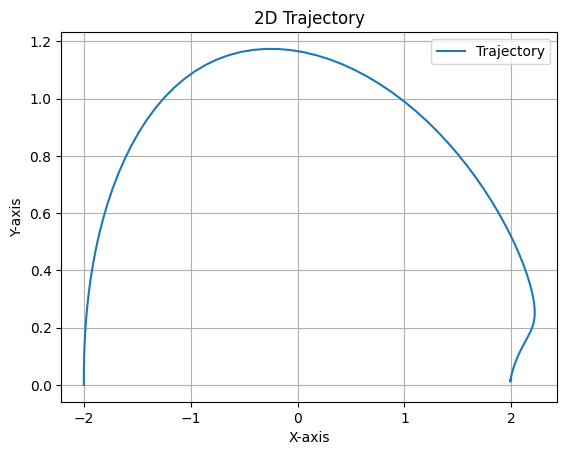

In [10]:
# Plot the trajectory
plt.plot(state[0], state[2], label="Trajectory")

# Add labels and title
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("2D Trajectory")

# Add legend and grid
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

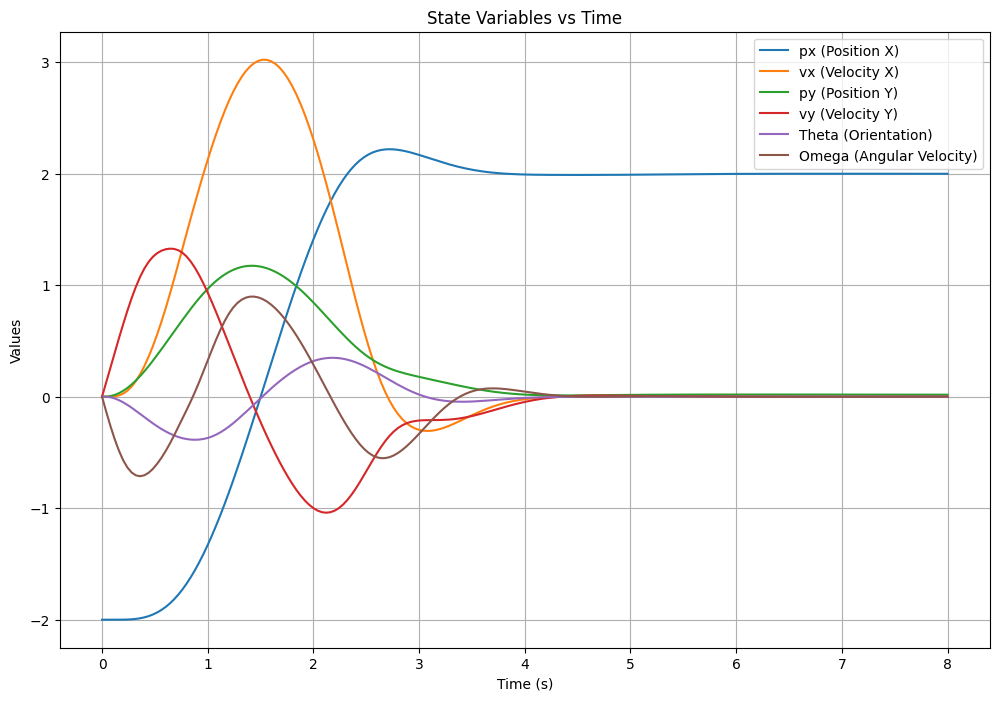

In [11]:
state = state.T
# Extract individual state variables
px = state[:, 0]  # Position X
vx = state[:, 1]  # Velocity X
py = state[:, 2]  # Position Y
vy = state[:, 3]  # Velocity Y
theta = state[:, 4]  # Orientation
omega = state[:, 5]  # Angular Velocity

# Plot each variable against the time
plt.figure(figsize=(12, 8))

plt.plot(t, px, label="px (Position X)")
plt.plot(t, vx, label="vx (Velocity X)")
plt.plot(t, py, label="py (Position Y)")
plt.plot(t, vy, label="vy (Velocity Y)")
plt.plot(t, theta, label="Theta (Orientation)")
plt.plot(t, omega, label="Omega (Angular Velocity)")

# Add labels, legend, and grid
plt.xlabel("Time (s)")
plt.ylabel("Values")
plt.title("State Variables vs Time")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()